In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import camb

In [4]:
camb_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, camb_path)
print('Using CAMB %s installed at %s'%(camb.__version__, os.path.dirname(camb.__file__)))

Using CAMB 1.3.5 installed at /usr/local/lib/python3.6/dist-packages/camb-1.3.5-py3.6.egg/camb


In [5]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0);

In [6]:
#calculate results for these parameters
results = camb.get_results(pars)

In [7]:
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

In [8]:
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [9]:
totCL=powers['total']
unlensedCL = powers['unlensed_scalar']

In [10]:
print(type(totCL))

<class 'numpy.ndarray'>


In [12]:
print(totCL[5,:])

[8.32606236e+02 3.00221211e-02 7.81277207e-06 2.51362369e+00]


In [20]:
ls = np.arange(totCL.shape[0])
print(len(ls))
print(ls[0:5])

2551
[0 1 2 3 4]


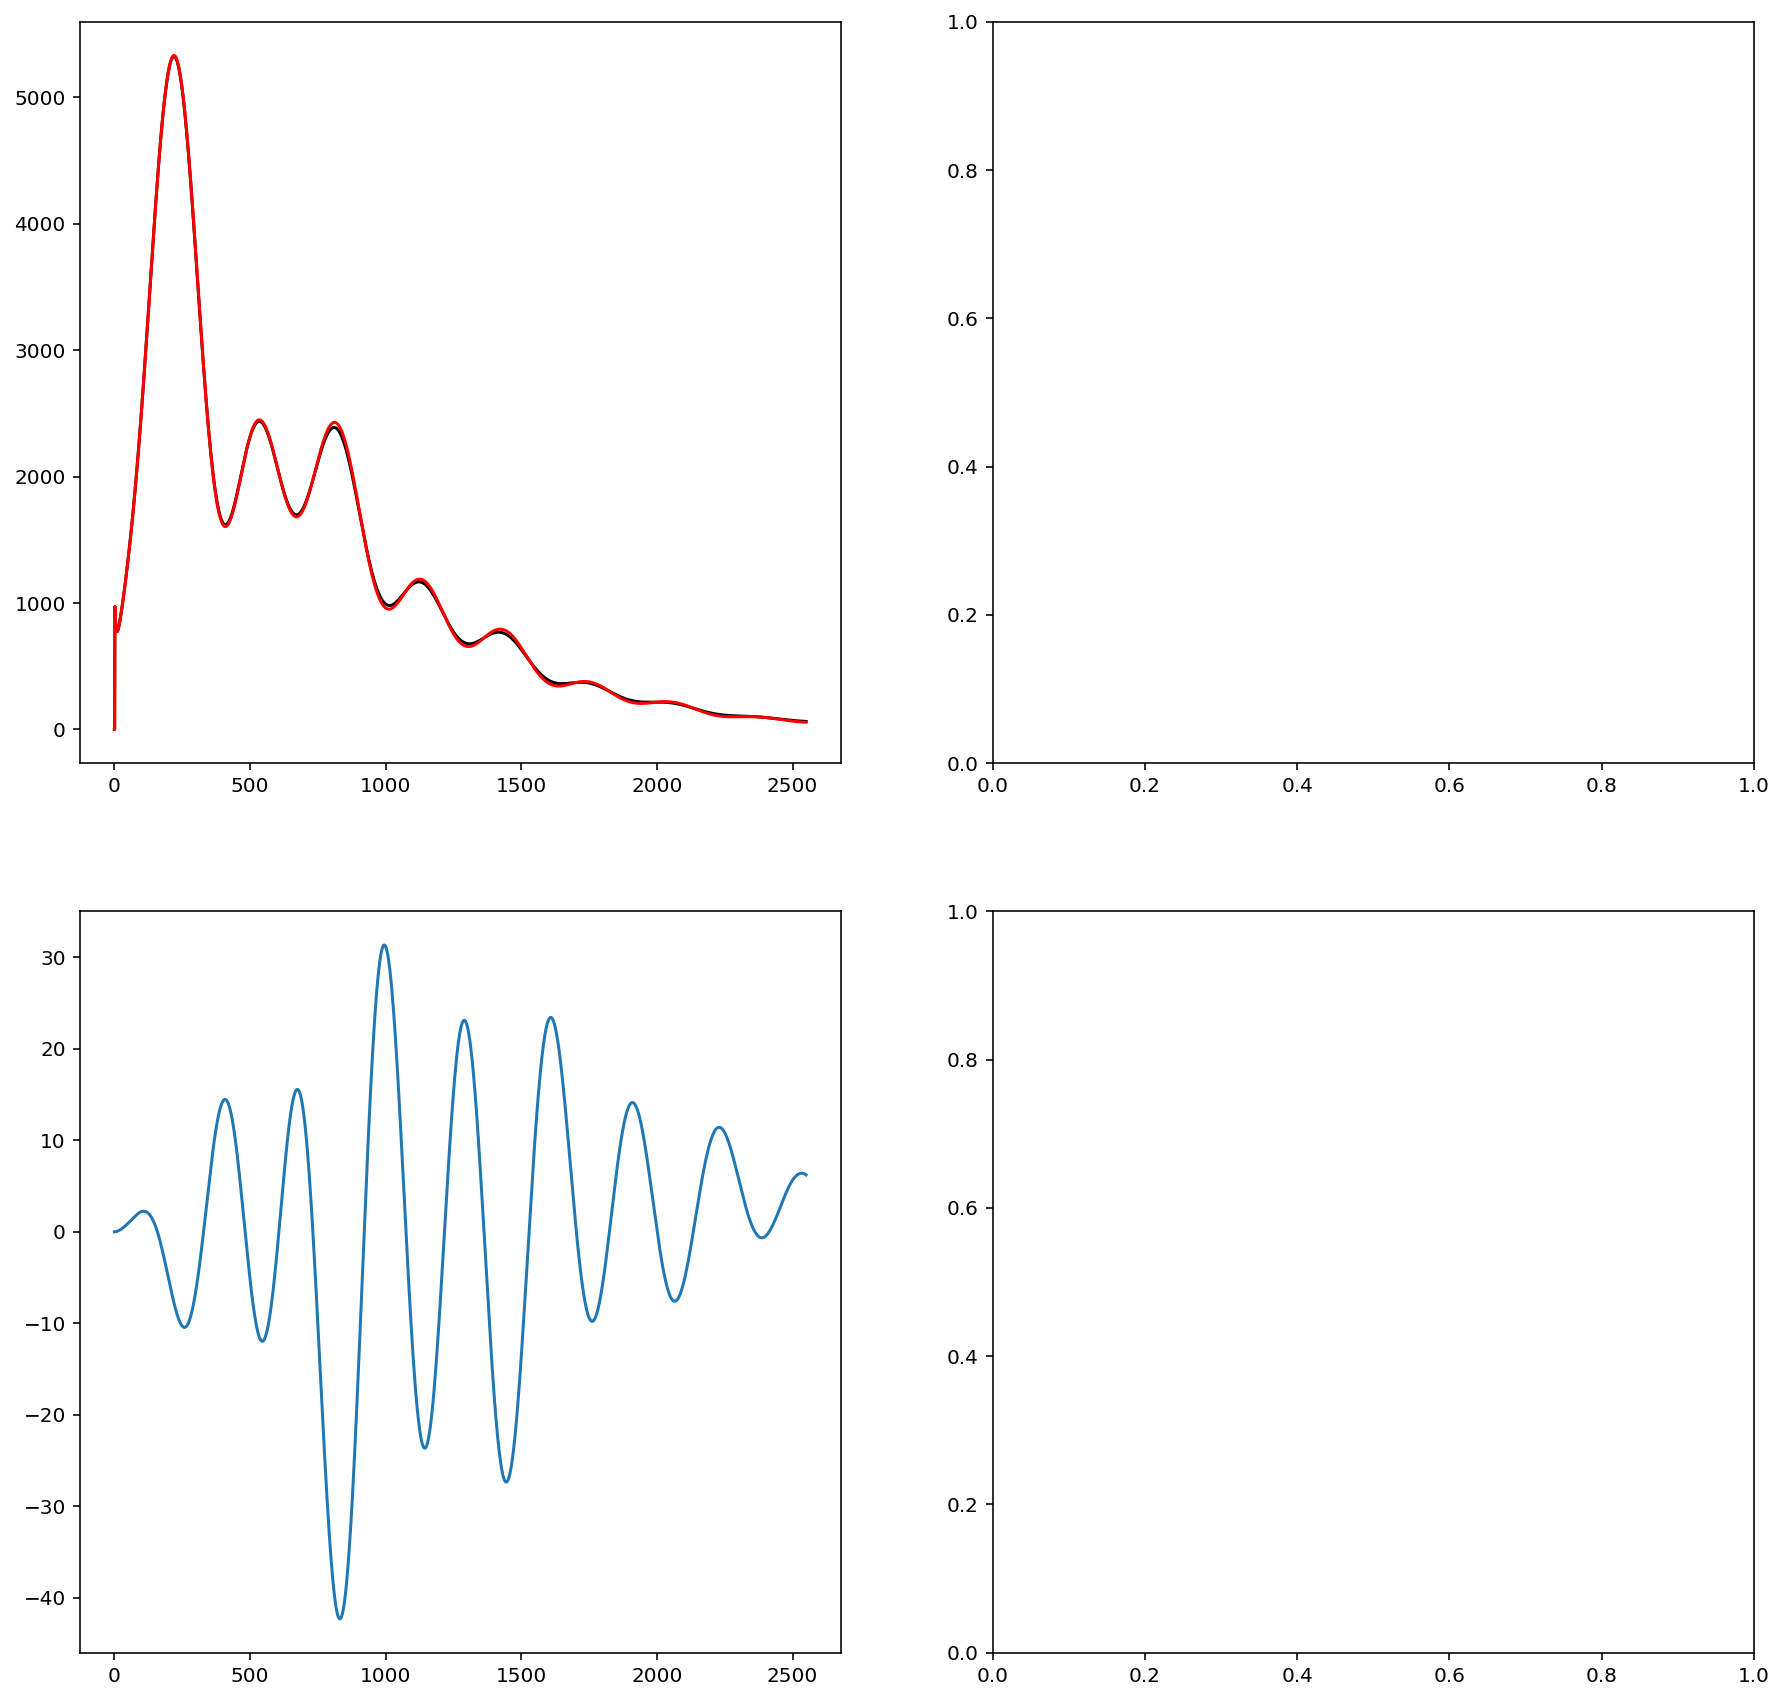

In [40]:
fig, ax = plt.subplots(2,2, figsize = (15,15))
ax[0,0].plot(ls, totCL[:,0], color = 'k')
ax[0,0].plot(ls, unlensedCL[:,0], color ='r')
ax[1,0].plot(ls,(totCL[:,0]-unlensedCL[:,0]))

In [42]:
print(ls[2:])

[   2    3    4 ... 2548 2549 2550]


In [43]:
pars.set_for_lmax(2500, lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax2500CL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(4000,lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax4000CL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(4000, lens_potential_accuracy=2)
results = camb.get_results(pars)
accCL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(6000, lens_potential_accuracy=4)
results = camb.get_results(pars)
refCL = results.get_lensed_scalar_cls(CMB_unit='muK')

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell^{BB}/2\\pi\\,[\\mu {\\rm K}^2]$')

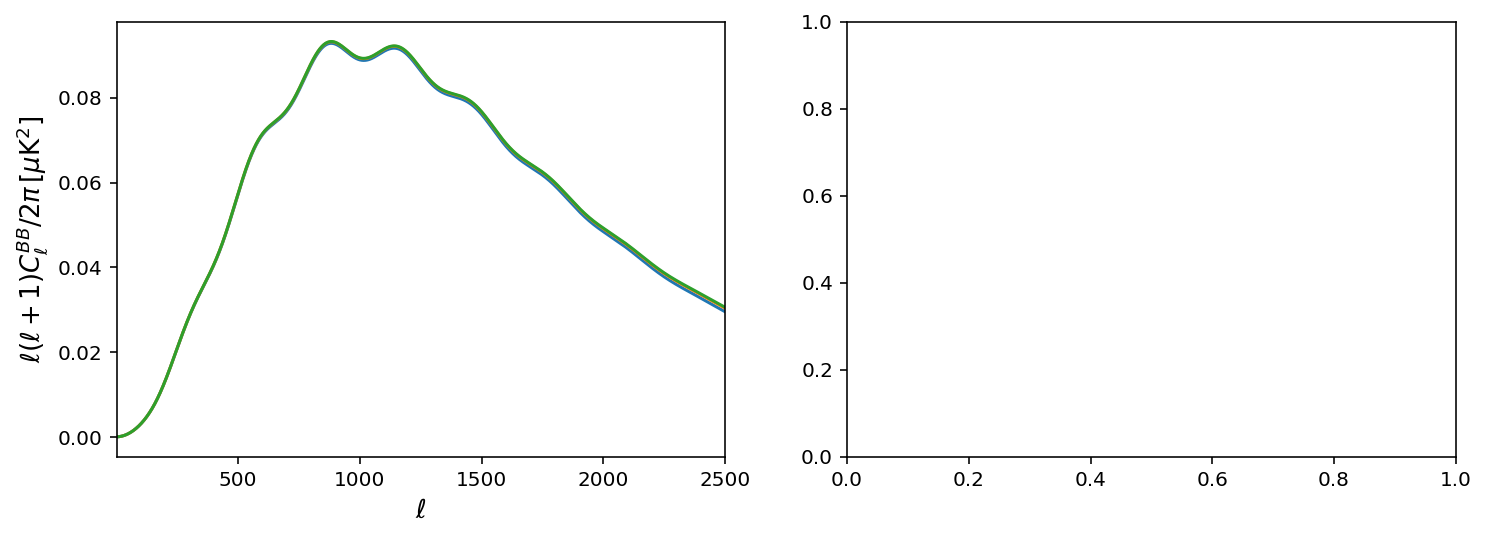

In [69]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
#ax[0].plot(ls, totCL[:len(ls),2], color = 'C0')
#ax[0].plot(ls, lmax2500CL[:len(ls),2], color='C1')
ax[0].plot(ls,lmax4000CL[:len(ls),2], color='C0')
ax[0].plot(ls,accCL[:len(ls),2], color='C1')
ax[0].plot(ls,refCL[:len(ls),2], color='C2')

ax[0].set_xlim([2,2500])
ax[0].set_xlabel(r'$\ell$',fontsize=13)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi\,[\mu {\rm K}^2]$', fontsize=13)

In [71]:
zip(ls,['-','--'])

TypeError: object of type 'zip' has no len()